# Retrieve a sequence from UniProt

In [1]:
import requests

accession = 'Q9BV79'

## Annotations

In [3]:
req_data = requests.get('http://www.uniprot.org/uniprot/' + accession + '.txt')

In [4]:
req_data.text

'ID   MECR_HUMAN              Reviewed;         373 AA.\nAC   Q9BV79; B3KT72; Q5SYU0; Q5SYU1; Q5SYU2; Q6IBU9; Q9Y373;\nDT   26-APR-2005, integrated into UniProtKB/Swiss-Prot.\nDT   31-MAY-2011, sequence version 2.\nDT   22-NOV-2017, entry version 148.\nDE   RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial {ECO:0000305};\nDE            EC=1.3.1.104 {ECO:0000305|PubMed:12654921, ECO:0000305|PubMed:18479707};\nDE   AltName: Full=2-enoyl thioester reductase;\nDE   AltName: Full=Nuclear receptor-binding factor 1;\nDE            Short=HsNrbf-1;\nDE            Short=NRBF-1;\nDE   Flags: Precursor;\nGN   Name=MECR; Synonyms=NBRF1; ORFNames=CGI-63;\nOS   Homo sapiens (Human).\nOC   Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;\nOC   Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;\nOC   Catarrhini; Hominidae; Homo.\nOX   NCBI_TaxID=9606;\nRN   [1]\nRP   NUCLEOTIDE SEQUENCE [LARGE SCALE MRNA] (ISOFORM 1), AND VARIANT\nRP   LEU-96.\nRX   PubMed=1

In [5]:
req_data.text.split('\n')

['ID   MECR_HUMAN              Reviewed;         373 AA.',
 'AC   Q9BV79; B3KT72; Q5SYU0; Q5SYU1; Q5SYU2; Q6IBU9; Q9Y373;',
 'DT   26-APR-2005, integrated into UniProtKB/Swiss-Prot.',
 'DT   31-MAY-2011, sequence version 2.',
 'DT   22-NOV-2017, entry version 148.',
 'DE   RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial {ECO:0000305};',
 'DE            EC=1.3.1.104 {ECO:0000305|PubMed:12654921, ECO:0000305|PubMed:18479707};',
 'DE   AltName: Full=2-enoyl thioester reductase;',
 'DE   AltName: Full=Nuclear receptor-binding factor 1;',
 'DE            Short=HsNrbf-1;',
 'DE            Short=NRBF-1;',
 'DE   Flags: Precursor;',
 'GN   Name=MECR; Synonyms=NBRF1; ORFNames=CGI-63;',
 'OS   Homo sapiens (Human).',
 'OC   Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;',
 'OC   Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;',
 'OC   Catarrhini; Hominidae; Homo.',
 'OX   NCBI_TaxID=9606;',
 'RN   [1]',
 'RP   NUCLEOTIDE SEQUENCE [LARGE SCALE M

## Structures available?

In [6]:
for line in req_data.text.split('\n'):
    if 'PDB;' in line:
        print(line)

DR   PDB; 1ZSY; X-ray; 1.75 A; A=40-373.
DR   PDB; 2VCY; X-ray; 2.41 A; A/B=31-373.


In [7]:
structdata = []
for line in req_data.text.split('\n'):
    if 'PDB;' in line:
        code = line.split(';')[1].strip()
        structdata.append(code)
print(structdata)

['1ZSY', '2VCY']


## Sequence

In [8]:
req_seq = requests.get('http://www.uniprot.org/uniprot/' + accession + '.fasta')
print(req_seq.text)

>sp|Q9BV79|MECR_HUMAN Enoyl-[acyl-carrier-protein] reductase, mitochondrial OS=Homo sapiens OX=9606 GN=MECR PE=1 SV=2
MWVCSTLWRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHGDPAKVVEL
KNLELAAVRGSDVRVKMLAAPINPSDINMIQGNYGFLPELPAVGGNEGVAQVVAVGSNVT
GLKPGDWVIPANAGLGTWRTEAVFSEEALIQVPSDIPLQSAATLGVNPCTAYRMLMDFEQ
LQPGDSVIQNASNSGVGQAVIQIAAALGLRTINVVRDRPDIQKLSDRLKSLGAEHVITEE
ELRRPEMKNFFKDMPQPRLALNCVGGKSSTELLRQLARGGTMVTYGGMAKQPVVASVSLL
IFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSQVPLQDYQSALEAS
MKPFISSKQILTM



## Multiple proteins

In [9]:
accessions = ['P97584', 'P00328', 'P19096', 'S0DRI1', 'A2R6H1', 'Q29073', 'P34055', 'Q24K16', 'W7LKX1', 
              'P38230', 'Q4W4Z2', 'W7MT31', 'Q64413', 'Q9Z2M2', 'P00327', 'P49327', 'P12785', 'Q9SLN8',
              'A0A0D2YG10', 'P79896', 'P26646', 'P0DN30', 'F2Z678', 'Q9P6C8', 'O57380', 'P22797']

In [10]:
for accession in accessions:
    req_data = requests.get('http://www.uniprot.org/uniprot/' + accession + '.txt')
    structdata = [line for line in req_data.text.split('\n') if 'PDB;' in line]
    codes = [column.split(';')[1].strip() for column in structdata]
    if len(codes) > 0:
        print(accession)
        print(','.join(codes))
        print()

P00328
1EE2

P38230
3QWA,3QWB

P00327
1A71,1A72,1ADB,1ADC,1ADF,1ADG,1AXE,1AXG,1BTO,1HET,1HEU,1HF3,1HLD,1JU9,1LDE,1LDY,1MG0,1MGO,1N8K,1N92,1P1R,1QLH,1QLJ,1QV6,1QV7,1YE3,2JHF,2JHG,2OHX,2OXI,3BTO,3OQ6,4DWV,4DXH,4NFH,4NFS,4NG5,4XD2,5ADH,5CDG,5CDS,5CDT,5CDU,5KCP,5KCZ,5KJ1,5KJ6,5KJC,5KJE,5KJF,5VJ5,5VJG,5VKR,5VL0,5VN1,6ADH,7ADH,8ADH

P49327
1XKT,2CG5,2JFD,2JFK,2PX6,3HHD,3TJM,4PIV,4W82,4W9N,4Z49,5C37

P12785
2PNG

Q9SLN8
4HFJ,4HFM,4HFN

P26646
1O89,1O8C

O57380
1P0C,1P0F



# BLAST

In [11]:
query_fasta = req_seq.text
print(query_fasta)

>sp|Q9BV79|MECR_HUMAN Enoyl-[acyl-carrier-protein] reductase, mitochondrial OS=Homo sapiens OX=9606 GN=MECR PE=1 SV=2
MWVCSTLWRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHGDPAKVVEL
KNLELAAVRGSDVRVKMLAAPINPSDINMIQGNYGFLPELPAVGGNEGVAQVVAVGSNVT
GLKPGDWVIPANAGLGTWRTEAVFSEEALIQVPSDIPLQSAATLGVNPCTAYRMLMDFEQ
LQPGDSVIQNASNSGVGQAVIQIAAALGLRTINVVRDRPDIQKLSDRLKSLGAEHVITEE
ELRRPEMKNFFKDMPQPRLALNCVGGKSSTELLRQLARGGTMVTYGGMAKQPVVASVSLL
IFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSQVPLQDYQSALEAS
MKPFISSKQILTM



In [12]:
from Bio.Blast import NCBIWWW

result_handle = NCBIWWW.qblast("blastp", "swissprot", query_fasta)

from Bio.Blast import NCBIXML

blast_record = NCBIXML.read(result_handle)

In [13]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
       print('****Alignment****')
       print('sequence:', alignment.title)
       print('length:', alignment.length)
       print('e value:', hsp.expect)

****Alignment****
sequence: gi|334302832|sp|Q9BV79.2|MECR_HUMAN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=HsNrbf-1; Short=NRBF-1; Flags: Precursor
length: 373
e value: 0.0
****Alignment****
sequence: gi|62900582|sp|Q7YS70.1|MECR_BOVIN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=BtNrbf-1; Short=NRBF-1; Flags: Precursor
length: 373
e value: 0.0
****Alignment****
sequence: gi|62900598|sp|Q9DCS3.2|MECR_MOUSE RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=NRBF-1; Flags: Precursor
length: 373
e value: 0.0
****Alignment****
sequence: gi|62900383|sp|Q9Z311.1|MECR_RAT RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondria

In [14]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            print(alignment.title)

gi|334302832|sp|Q9BV79.2|MECR_HUMAN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=HsNrbf-1; Short=NRBF-1; Flags: Precursor
gi|62900582|sp|Q7YS70.1|MECR_BOVIN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=BtNrbf-1; Short=NRBF-1; Flags: Precursor
gi|62900598|sp|Q9DCS3.2|MECR_MOUSE RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=NRBF-1; Flags: Precursor
gi|62900383|sp|Q9Z311.1|MECR_RAT RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=NRBF-1; Flags: Precursor
gi|62900529|sp|Q6GQN8.2|MECR_DANRE RecName: Full=Enoyl-[acyl-

In [15]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            print(alignment.title.split('|')[3])

Q9BV79.2
Q7YS70.1
Q9DCS3.2
Q9Z311.1
Q6GQN8.2
Q28GQ2.1
Q9V6U9.2
Q8LCU7.1
Q54YT4.1
O45903.1
Q10488.1
Q9XXC8.1
Q6CBE4.1
Q8WZM4.1
Q8WZM3.1
Q6BV30.1
Q6FXN7.2
Q8NJJ9.1
Q6CIR6.1
P38071.3
Q757U3.2
Q6BLV6.2


In [16]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            raw_accession = alignment.title.split('|')[3]
            print(raw_accession[:raw_accession.index('.')])

Q9BV79
Q7YS70
Q9DCS3
Q9Z311
Q6GQN8
Q28GQ2
Q9V6U9
Q8LCU7
Q54YT4
O45903
Q10488
Q9XXC8
Q6CBE4
Q8WZM4
Q8WZM3
Q6BV30
Q6FXN7
Q8NJJ9
Q6CIR6
P38071
Q757U3
Q6BLV6


In [17]:
blast_accessions = []

for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            raw_accession = alignment.title.split('|')[3]
            blast_accessions.append(raw_accession[:raw_accession.index('.')])
    
    
print(blast_accessions)

['Q9BV79', 'Q7YS70', 'Q9DCS3', 'Q9Z311', 'Q6GQN8', 'Q28GQ2', 'Q9V6U9', 'Q8LCU7', 'Q54YT4', 'O45903', 'Q10488', 'Q9XXC8', 'Q6CBE4', 'Q8WZM4', 'Q8WZM3', 'Q6BV30', 'Q6FXN7', 'Q8NJJ9', 'Q6CIR6', 'P38071', 'Q757U3', 'Q6BLV6']


In [18]:
for accession in blast_accessions:
    req_data = requests.get('http://www.uniprot.org/uniprot/' + accession + '.txt')
    structdata = [line for line in req_data.text.split('\n') if 'PDB;' in line]
    codes = [column.split(';')[1].strip() for column in structdata]
    if len(codes) > 0:
        print(accession)
        print(','.join(codes))
        print()

Q9BV79
1ZSY,2VCY

Q8WZM4
1H0K,1N9G

Q8WZM3
1GU7,1GUF,1GYR,1N9G,4W99,4WAS,5LB9,5LBX



# Multiple sequence alignment

## Get sequences

In [19]:
fasta_sequences = [] 
for accession in blast_accessions:
    req_seq = requests.get('http://www.uniprot.org/uniprot/' + accession + '.fasta')
    fasta_sequences.append(req_seq.text)

for sequence in fasta_sequences:
    print(sequence)

>sp|Q9BV79|MECR_HUMAN Enoyl-[acyl-carrier-protein] reductase, mitochondrial OS=Homo sapiens OX=9606 GN=MECR PE=1 SV=2
MWVCSTLWRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHGDPAKVVEL
KNLELAAVRGSDVRVKMLAAPINPSDINMIQGNYGFLPELPAVGGNEGVAQVVAVGSNVT
GLKPGDWVIPANAGLGTWRTEAVFSEEALIQVPSDIPLQSAATLGVNPCTAYRMLMDFEQ
LQPGDSVIQNASNSGVGQAVIQIAAALGLRTINVVRDRPDIQKLSDRLKSLGAEHVITEE
ELRRPEMKNFFKDMPQPRLALNCVGGKSSTELLRQLARGGTMVTYGGMAKQPVVASVSLL
IFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSQVPLQDYQSALEAS
MKPFISSKQILTM

>sp|Q7YS70|MECR_BOVIN Enoyl-[acyl-carrier-protein] reductase, mitochondrial OS=Bos taurus OX=9913 GN=MECR PE=1 SV=1
MWVCGALCRTRAPAQLGQRLLPESRRRRPASASFSASAEPSRVRALVYGHHGDPAKVVEL
KNLELAAVGGSHVHVKMLAAPINPSDINMIQGNYGLLPQLPAVGGNEGVGQVVAVGSGVT
GVKPGDWVIPANPGLGTWRTEAVFGEEELITVPSDIPLQSAATLGVNPCTAYRMLVDFER
LRPRDSIIQNASNSGVGQAVIQIAAARGLRTINVLRDTPDLQKLTDTLKNLGANHVVTEE
ELRKPEMKSFFKDVPQPRLALNCVGGKSSTELLRHLAPGGTMVTYGGMAKQPVIASVSQL
IFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSEVPLQDYLCALEAS
TQPFVSSKQILTM

>sp|

In [20]:
outfile = open('blast_hits.fasta', 'w')
for sequence in fasta_sequences:
        outfile.write(sequence)

### Make multiple sequence alignment in Clustal Omega

In [21]:
!clustalo -i blast_hits.fasta -o blast_hits.cali

### Continue with analysis

In [22]:
from Bio import AlignIO
alignment = AlignIO.read("blast_hits.cali", "fasta")

In [23]:
for seq in alignment:
    print(seq.seq[:100])

------MW-VCSTL--WRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHG--DPAKVVELKNLELAA--VRGSDVRVKMLAAPINPSDI
------MW-VCGAL--CRTRAPAQLGQRLLPESRRRRPASASFSASAEPSRVRALVYGHHG--DPAKVVELKNLELAA--VGGSHVHVKMLAAPINPSDI
------ML-VSQRV--TGARARAPQLAGLLEAWYRHGRTTSSYSALSEPSRVRALVYGNHG--DPAKVVQLKNLELTA--VEGSDVHVRMLAAPINPSDI
------ML-VSRRL--TGARARAPLLASLLEAWCRQGRTTSSYSAFSEPSHVRALVYGNHG--DPAKVIQLKNLELTA--VEGSDVHVKMLAAPINPSDI
MKLPSVAS-LLIRV--YRTTGPVSHIQR----IRHGAVLNKNYSSVSAVKNCTALLYRNHG--EPSQVVQLESLDLPQ--VGAECVLVKMLAAPINPSDL
------MW-LGLRL----------------------------FHRPFSSLAARGLVYEKHG--EPLQVLRLKNVNITH--PADNEVRVKMLAAPINPSDI
---------MLRRG--FLSRIN-----------------AAQWS-RQMSVVAKSLKYTQHG--EPQEVLQLVEDKLPD--PKDNQVLVKILAAPINPADI
--MAALMESVVGRALKFSSTANFRSIRR----GETPTLCIKSFS-TIMSPPSKAIVYEEHG--SPDSVTRLVNLPPVE--VKENDVCVKMIAAPINPSDI
-----------------------------------MNSTRNIISLVRRYSTSRSVKIASHG--SPSTALKIENENITDK-ISNKDVLVEMLHAPINPADL
------ML-----------------------------KVLSLRSALQRAASTRQLVYEGYR--NPPEAIQLKTVTIADK-PSADQVLVQWI

In [24]:
from Bio.Align import AlignInfo

summary_align = AlignInfo.SummaryInfo(alignment)

## Consensus sequence

In [25]:
summary_align.dumb_consensus()

Seq('MKXXXXMXXXXXXXLKXXXRXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXA...SHI', SingleLetterAlphabet())

## PSSM

In [26]:
pssm = summary_align.pos_specific_score_matrix()

print(pssm)

    -   A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y
M  16.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
K  16.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  15.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  15.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  15.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
X  15.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
M  5.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 11.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  4.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 3.0 3.0
X  11.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 4.0 0.0 0.0 0.0 0.0
X  4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 2.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 7.0 0.0 0.0
X  4.0 0.0 2.0 0.0 0.0 0.0 1.0 0.0 0

In [27]:
for position in pssm:
    print(max(position.values())/len(alignment))

0.9411764705882353
0.9411764705882353
0.8823529411764706
0.8823529411764706
0.8823529411764706
0.8823529411764706
0.6470588235294118
0.23529411764705882
0.6470588235294118
0.4117647058823529
0.35294117647058826
0.23529411764705882
0.35294117647058826
0.29411764705882354
0.9411764705882353
0.9411764705882353
0.5882352941176471
0.5882352941176471
0.5882352941176471
0.5882352941176471
0.5882352941176471
0.5882352941176471
0.6470588235294118
0.6470588235294118
0.6470588235294118
0.6470588235294118
0.6470588235294118
0.6470588235294118
0.5294117647058824
0.5294117647058824
0.5294117647058824
0.4117647058823529
0.35294117647058826
0.47058823529411764
0.47058823529411764
0.23529411764705882
0.23529411764705882
0.17647058823529413
0.17647058823529413
0.23529411764705882
0.23529411764705882
0.4117647058823529
0.35294117647058826
0.5882352941176471
0.35294117647058826
0.23529411764705882
0.23529411764705882
0.23529411764705882
0.29411764705882354
0.35294117647058826
0.23529411764705882
0.3529411

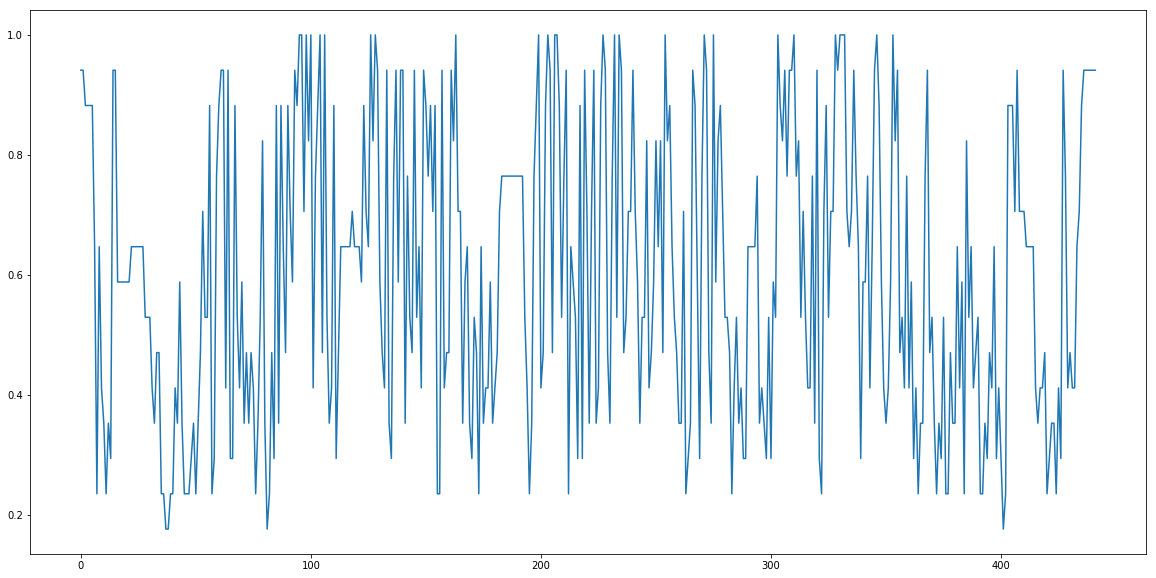

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


values = []
for position in pssm:
    values.append(max(position.values())/len(alignment))
    
fig = plt.figure(figsize = (20, 10))
plt.plot(values)

# Assignment 1

## Handle sequences and perform alignment

In [33]:
import requests

cyp21_seq = requests.get('http://www.uniprot.org/uniprot/P08686.fasta').text

mut_seq = '''>cyp21a2_translated_mut
MLLLGLLLLLPLLAGARLLWNWWKLRSLHLPPLAPGFLHLLQPDLPIYLLGLTQKFGPIY
RLHLGLQDVVVLNSKRTIEEAMVKKWADFAGRPEPLTYRLVSKNYPDLSLGDYSLLWKAH
KKLTRSALLLGIRDSMEPVVEQLTQEFCERMRAQPGTPVAIEEEFSLLTCSIICYLTFGD
KIKDDNLMPAYYKCIQEVLKTWSHWSIQIVDVIPFLRFFPNPGLRRLKQAIEKRDHIVEM
QLRQHKESLVAGQWRDMMDYMLQGVAQPSMEEGSGQLLEGHVHMAAVDLLISGTETTANT
LSWAVVFLLHHPEIQQRLQEELDHELGPGASSSRVPYKDRARLPLLNATIAEVLRLRPVV
PLALPHRTTRPSSISGYDIPEGTVIIPNLQGAHLDETVWERPHEFWPDRFLEPGKNSRAL
AFGCGARVRLGEPLARLELFVVLTRLLQAFTLLPSGDALPSLQPLPHCSVILKMQPFQVR
LQPRGMGAHSPGQNQ'''

with open('cyp21_comparison.fasta', 'w') as outfile:
    outfile.write(cyp21_seq)
    outfile.write(mut_seq)

In [34]:
! kalign cyp21_comparison.fasta > cyp21_comparison.kali 2> /dev/null

## Find mutations

In [61]:
from Bio import AlignIO
alignment = AlignIO.read("cyp21_comparison.kali", "fasta")

print('Pos\tCYP21\tMut')
muts = []
prot_pos = 0
positions = []
for i in range(len(alignment[0])):
    if alignment[0][i] != alignment[1][i]:
        muts.append([str(prot_pos+1), alignment[0][i], alignment[1][i]])
        positions.append(prot_pos+1)
        print('\t'.join(muts[-1]))
    if alignment[0][i] != '-':
        prot_pos += 1


Pos	CYP21	Mut
6	-	L
98	K	R
291	G	S
428	C	R


## Look for information in UniProt

In [60]:
cyp21_data = requests.get('http://www.uniprot.org/uniprot/P08686.txt').text

positions = []
for mut in muts:
    positions.append(int(mut[0])

for line in cyp21_data.split('\n'):
    if line[:2] == 'FT': # Feature Table
        for pos in positions:
            if ' ' + pos + ' ' in line[:27]:
                    print(line)

SyntaxError: invalid syntax (<ipython-input-60-8b7b215663ca>, line 7)

In [64]:
from Bio import ExPASy
handle = ExPASy.get_sprot_raw('P08686')

from Bio import SwissProt
record = SwissProt.read(handle)

print(record.description)

RecName: Full=Steroid 21-hydroxylase; EC=1.14.14.16 {ECO:0000269|PubMed:16984992, ECO:0000269|PubMed:22014889, ECO:0000269|PubMed:25855791, ECO:0000269|PubMed:27721825}; AltName: Full=21-OHase; AltName: Full=Cytochrome P-450c21; AltName: Full=Cytochrome P450 21; AltName: Full=Cytochrome P450 XXI; AltName: Full=Cytochrome P450-C21; AltName: Full=Cytochrome P450-C21B;


In [63]:
for feature in record.features:
    if feature[1] in positions:
        print(feature)

[6, 98, 291, 428]
('METAL', 428, 428, 'Iron (heme axial ligand). {ECO:0000269|PubMed:25855791}.', '')
('VAR_SEQ', 6, 6, 'L -> LL (in isoform 2). {ECO:0000303|PubMed:14702039}.', 'VSP_046264')
('VARIANT', 98, 98, 'K -> R.', 'VAR_001282')
('VARIANT', 291, 291, 'G -> C (in AH3). {ECO:0000269|PubMed:10364682}.', 'VAR_026068')
('VARIANT', 291, 291, 'G -> R (in AH3; dbSNP:rs201552310). {ECO:0000269|PubMed:12915679}.', 'VAR_018365')
('VARIANT', 291, 291, 'G -> S (in AH3; salt wasting form; less then 1% activity; dbSNP:rs201552310). {ECO:0000269|PubMed:10408778, ECO:0000269|PubMed:11600539, ECO:0000269|PubMed:1496017, ECO:0000269|PubMed:15110320, ECO:0000269|PubMed:20080860, ECO:0000269|PubMed:9497336}.', 'VAR_001293')
('MUTAGEN', 428, 428, 'C->M,S,T: Loss of activity and loss of P450 absorption. {ECO:0000269|PubMed:1864962}.', '')


In [66]:
for feature in record.features:
    if feature[1] in positions:
        print('\t'.join([str(feature[1]), feature[3]]))

[6, 98, 291, 428]
428	Iron (heme axial ligand). {ECO:0000269|PubMed:25855791}.
6	L -> LL (in isoform 2). {ECO:0000303|PubMed:14702039}.
98	K -> R.
291	G -> C (in AH3). {ECO:0000269|PubMed:10364682}.
291	G -> R (in AH3; dbSNP:rs201552310). {ECO:0000269|PubMed:12915679}.
291	G -> S (in AH3; salt wasting form; less then 1% activity; dbSNP:rs201552310). {ECO:0000269|PubMed:10408778, ECO:0000269|PubMed:11600539, ECO:0000269|PubMed:1496017, ECO:0000269|PubMed:15110320, ECO:0000269|PubMed:20080860, ECO:0000269|PubMed:9497336}.
428	C->M,S,T: Loss of activity and loss of P450 absorption. {ECO:0000269|PubMed:1864962}.
